# Recall the Transportation Problem we discussed in class.

## Suppose I increase the supply at some of the suppliers. How does this affect the optimal solution?




Assumed that the original condition has enough supply to fill demand, which means ($\sum{s_i} \geq \sum {d_j}$), if we increase the supply at some of the suppliers, the optimal solution may remain the same or may be improved to has lower cost. It depends on which suppliers' supply increase.

1) If we increase the suppliers which far from customers, the optimal solution will ignore them, and the lowest cost remains the same.
        
2) If we increase the suppliers with low cost, the optimal solution will be updated. It will take more items from the suppliers with low cost and less items from those with high cost. In this way, the total cost will be decreases.

## Suppose I increase the supply at some of the suppliers and the demand at some of the consumers. Does the total cost increase, decrease, or it depends. Argue your case and/or provide examples to prove your point.

It depends.

With the increasement in both supply and demand, the total cost usually increase due to more flow is requested in the network. 

But in some special cases, the total cost may decrease. Imaging we increase the suppliers with very low cost, although the flow increases, but we can also improve our optimal solution by replacing the high cost supplier by the extra low cost suppliers. If the decreasement is more than the increasement, the total cost can decrease in this situation.

Here are examples, one for the total cost increasing and one for cost decreasing:

In [1]:
from scipy.optimize import linprog
'''
To solve the minimum total cost problem, we can get 
the linear optimization formulation as below:
we want:
    min 100 * Fa1 + 100 * Fa2 + 1 * Fb1 + 1 * Fb2 + 0 * Fa0 + 0 * Fa0 
    (0 is where the extra supply flows to)
subject to:
    Fa1 + Fa2 + Fa0 = Sa
    Fb1 + Fb2 + Fb0 = Sb
    Fa1 + Fb1 = D1
    Fa2 + Fb2 = D2

optimal scheme x represents [Fa1, Fa2, Fb1, Fb2, Fa0, Fa0]

Original Supply and Demand:
Demand:         Supply:
D1 = 20          A = 20
D2 = 10          B = 10
'''

c = [100, 100, 1, 1, 0, 0] # Ca1,Ca2,Cb1,Cb2,Caz,Cbz
# LS constraints:
A = [[1, 1, 0, 0, 1, 0], [0, 0, 1, 1, 0, 1], 
     [-1, 0, -1, 0, 0, 0], [0, -1, 0, -1, 0, 0]] 
b = [20, 10, -20, -10]

origin_case = linprog(c, A_eq = A, b_eq = b)
print("Original problem:")
print("\t total cost = "+ str(origin_case.fun))
print("\t optimal scheme = "+ str(origin_case.x))


# Case 1: increase supply at B and demand at D2
'''
Increase Supply by 30 at B and Demand by 10 at D2:
Demand:         Supply:
D1 = 20          A = 20
D2 = 20          B = 40
'''
b = [20, 40, -20, -20] # new LS constraints
first_case = linprog(c, A_eq = A, b_eq = b) 
print("After increasing demand and supply(Case 1)")
print("\t total cost = "+ str(first_case.fun))
print("\t optimal scheme = "+ str(first_case.x))


# Case 2: increase supply at A and demand at D2
'''
Increase Supply by 30 at A and Demand by 10 at D2:
Demand:         Supply:
D1 = 20          A = 50
D2 = 20          B = 10
'''
b = [50, 10, -20, -20] # new LS constraints
second_case = linprog(c, A_eq = A, b_eq = b)
print("After increasing demand and supply(Case 2):")
print("\t total cost = "+ str(second_case.fun))
print("\t optimal scheme = "+ str(second_case.x))

Original problem:
	 total cost = 2010.0
	 optimal scheme = [ 10.  10.  10.   0.   0.   0.]
After increasing demand and supply(Case 1)
	 total cost = 40.0
	 optimal scheme = [  0.   0.  20.  20.  20.   0.]
After increasing demand and supply(Case 2):
	 total cost = 3010.0
	 optimal scheme = [ 10.  20.  10.   0.  20.   0.]


From above, we can see that in different cases, the total cost can either increase or decrease. So it depends on how we change the supply and demand.

# We focus on applying the Route Inspection Problem on a real world example.

## Find a neighborhood in New York City that is strongly connected. Let nodes correspond to intersections and edges correspond to roads. A two way street should correspond to two edges, one in each direction. Your neighborhood (directed graph) should have at least 8 nodes. Let edge costs of the graph correspond to approximate time to travel on the edge. This can be done with educated guessing. Draw the corresponding graph and label the streets.


I chose the neighborhood near Columbia University, Including the streets between Broadway and Amsterdan Avenue; 110th St and 114th St. 

In this graph, Broadway and Amsterdan Avenue edges have a cost of 1 except between 114th and 120th St due to the length of road, and all street edges have a cost of 2 except for 110th and 120th St which are broad like avenue. Broadway and Amsterdan Avenue between 114th and 120th St has cost 6. 110th and 120th St has cost 1.5. 

Except Broadway, Amsterdan Avenue and 110th, 120th St, other edges are all single way. To be concise, We represent Amsterdan as A and Broadway as B.

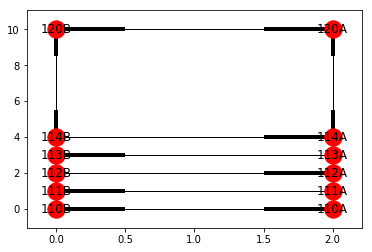

In [2]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_edges_from([('110A','111A'),('111A','112A'),
                  ('112A','113A'),('113A','114A')], weight = 1)
G.add_edges_from([('114A','113A'),('113A','112A'),
                  ('112A','111A'),('111A','110A')], weight = 1)
G.add_edges_from([('110B','111B'),('111B','112B'),
                  ('112B','113B'),('113B','114B')], weight = 1)
G.add_edges_from([('114B','113B'),('113B','112B'),
                  ('112B','111B'),('111B','110B')], weight = 1)
G.add_edges_from([('114B','120B'),('114A','120A'),
                  ('120B','114B'),('120A','114A')], weight = 6)
G.add_edges_from([('110A','110B'),('110B','110A'),
                  ('120A','120B'),('120B','120A')], weight = 1.5)
G.add_edges_from([('111A','111B'),('112B','112A'),
                  ('113A','113B'),('114B', '114A')], weight = 2)
positions = {'110A':(2,0),'110B':(0,0),'111A':(2,1),'111B':(0,1),
             '112A':(2,2),'112B':(0,2),'113A':(2,3),'113B':(0,3),
             '114A':(2,4),'114B':(0,4),'120A':(2,10),'120B':(0,10),}

nx.draw_networkx(G,arrows=True,pos=positions) 

## Code the linear optimization formulation for the Route Inspection Problem (remember to include it) and find the optimal flow. Hint: It may be easier to describe your graph as a matrix like in previous homework. Then your optimization formulation should be couple lines of code if you use an optimization modeling language.


First, I wrote the graph as matrix, using cost = 1000 if the edges don't exist.

Nodes are represented as:
0 : 110A, 1 : 111A, 2 : 112A, 3 : 113A, 4 : 114A, 5: 120A, 6 : 110B, 7 : 111B, 8 : 112B, 9 : 113B, 10 : 114B, 11 : 120B

Read the csv file which stores the cost matrix.

In [3]:
from scipy.optimize import linprog
import pandas as pd
import numpy as np
import random

# read CSV file
df = pd.read_csv("110A-120B.csv",header=None)
graph = df.as_matrix()

To solve Route Inspection Problem, we can get the linear optimization formulation as below:
we want:

$$min \space \sum_{(i,j)\in E} {c_{ij} * f_{ij}}$$
    
subject to    

$$f_{ij} \geq 1, \space\space \forall (i,j) \in E $$
    
$$\sum_{j\mid(i,j)\in E}{f_{ij}} - \sum_{j\mid(i,j)\in E}{f_{ji}} = 0, \space\space \forall i \in V$$

In [4]:
'''
We use an array x with length 10*10 to represent matrix (f_ij).
We also use an array C with length 10*10 to represent cost matrix (c_ij).
Then we set up LP constrain A*x = b for this question.
'''
# Cost Matrix as array:
C = graph.flatten()

# Set LP Constrain A*x = b to satisfy each node has flow_in - flow_out = 0

# A is a list contain 10 elements, 
# each is an array with length 100 to satify one node has flow_in - flow_out = 0.
# Outgoing edge = -1
# Incoming edge = 1
A = list()
for i in range(len(graph)):
    Intersection = [0]*(len(graph)**2)
    for j in range(len(graph)):
        if i != j: # no self serving nodes
            if graph[i][j]<1000:
                Intersection[i*len(graph)+j] = -1
            if graph[j][i]<1000:
                Intersection[j*len(graph)+i] = 1
    A.append(Intersection)
    
# b is an array with length 10, 
# representing the difference between outgoing flow and incoming flow for each node.
b = [0]*len(graph)
    
# Set Bounds on edges to satisfy f_ij >= 1:
Bounds = list()
for i in range(len(C)):
    if C[i] < 1000 and C[i] != 0: # existed edges
        Bounds.append( (1,None) )
    else: # unexisted edges
        Bounds.append( (0,None) )

flow = linprog(C, A_eq=A, b_eq=b, bounds=Bounds)

print("Minimum Total Cost: " + str(flow.fun))
optimal_flow = flow.x.reshape(len(graph),len(graph))
print("Best Solution:")
print(optimal_flow)

Minimum Total Cost: 58.0
Best Solution:
[[ 0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  2.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  2.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  2.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  2.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.]]


## Convert your flow to an optimal route, and show your work.

There are two steps to solve this problem. First, find all the cycles W1, W2, ... Second, using the algorithm to find the route.

Now, We accomplish the first step:

In [5]:
'''
Specifically, start at any node, and take any path until a cycle is formed. 
Since b(i) = 0, i.e., the flow in is the same as the flow out at every node, 
Then a random path must eventually form a cycle. 
Once a cycle is formed, removing the corresponding edges in the cycle from G′ 
Repeat until there are no more edges left. 
'''

def find_cycle(path, last, edges, Cycles):
    cycle = dict()
    while True:
        next_node = path[last]
        # Create cycle dictionary {key:[next_node, times visited(initialized as 0)]}
        cycle[last] = [next_node, 0]
        # removing the corresponding edges in the cycle from G′
        edges[last][next_node] = edges[last][next_node] - 1  
        if next_node in cycle.keys(): # we finished a cycle
            break
        last = next_node # Continue searching until a cycle completed
        
    Cycles.append(cycle) # update Cycles
    return (Cycles,edges)

# Initialization
Cycles = list()
flows = np.copy(optimal_flow)
starting_nodes= set(range(len(flows)))

# Start finding
while len(starting_nodes) != 0:
    start = random.choice(tuple(starting_nodes))
    path = dict()
    i = start
    j = 0
    while j < len(flows):
        if flows[i][j] > 0: # If there is flow from i to j, go to j
            path[i] = j
            if j in path.keys(): # find a cycle
                # add cycle to Cycles list, and delete used edges
                Cycles, flows = find_cycle(path, j, flows, Cycles)
                break
            i = j
            j = 0
            continue
        j+=1
    # reset starting nodes, which have outgoing flow
    starting_nodes= set(np.where(np.sum(flows, axis=1)>0)[0]) 

Cycles

[{0: [1, 0], 1: [0, 0]},
 {0: [6, 0], 6: [0, 0]},
 {6: [7, 0], 7: [6, 0]},
 {1: [2, 0], 2: [1, 0]},
 {1: [7, 0], 2: [1, 0], 7: [8, 0], 8: [2, 0]},
 {2: [3, 0], 3: [2, 0]},
 {3: [4, 0], 4: [3, 0]},
 {7: [8, 0], 8: [7, 0]},
 {8: [9, 0], 9: [8, 0]},
 {3: [9, 0], 4: [3, 0], 9: [10, 0], 10: [4, 0]},
 {4: [5, 0], 5: [4, 0]},
 {5: [11, 0], 11: [5, 0]},
 {9: [10, 0], 10: [9, 0]},
 {10: [11, 0], 11: [10, 0]}]

Now we have got all the cycles in the graph. We do the second step to find optimal route.

In [6]:
# initialze variables
Unvisited = set()
for i in range(1, len(Cycles)):
    Unvisited.add(i)
S = [Cycles[0]]
i = random.choice(tuple(S[-1].keys()))
path = [i]

while S:
    W = S[-1] # Let W be the cycle in S that was last to be added
    W[i][1] = W[i][1] + 1 # mark as visited
    i = W[i][0] # Let i be the next node in the current cycle W
    path.append(i)
    if W[i][1] > 0: # we have visited on this cycle
        S.pop() # S = S\W
        
    for j in Unvisited:
        if i in Cycles[j].keys(): # if i is on a new cycle W, we add it to S.
            S.append(Cycles[j])
            Unvisited.remove(j)
            break

print(path)

[1, 0, 6, 7, 8, 7, 8, 9, 10, 9, 10, 11, 5, 4, 3, 2, 1, 2, 3, 4, 5, 11, 10, 4, 3, 9, 8, 2, 1, 7, 6, 0, 1]


# Consider the following variations of the Route Inspection problem.
## Suppose we have two trucks instead of one. Together, the two trucks (snow plows, for example) have to travel on all the edges. What should be our objective?

A K-RSP instance is defined by k ≥ 2 postmen on a connected undirected graph G = (V, E). The postmen have to walk all service edges in E at least once.

One idea is that we should minimize the total cost of all the k postmen. But usually it gets the result that only one postman is needed, which doesn't make best of all the sources. So we usually want to minimize the maximum cost among the k postmen. In this way, we courage them to work in the same time to reduce the maximum cost. We can write our objective as below:

$$min \space\space max_{i = 1}^{k} {(cost(T_i))}$$

In this question, we have two trucks, k = 2
$$min \space\space max(cost(T_1), cost(T_2))$$

## Provide a seemingly reasonable heuristic to part a) that uses our algorithm for one truck.

We can realize this idea by:

First, we use our algorithm for one truck to get the shortest heuristic P for one postman, with cost C. <br>
Second, We set R = C/k, which will be the approximately every postman's task.<br>
Third, now we go through the P to devide it into k part, connect their endpoints to the start point.

All the k paths form our answer to this k-Route Inspection problem.

## Implement your idea from part b) on the graph you constructed in Question 2.

In [7]:
def kRSP(k, G, C, path):
    start_point = path[0]
    S = list()
    R = C/k
    i = 1
    while i < k:
        r = 0
        temp = [path[0]]
        for j in range(len(path)):
            curr_node = path[j]
            next_node = path[j+1]
            temp.append(next_node)
            C -= graph[curr_node][next_node]
            r += graph[curr_node][next_node]
            if r > R:
                if temp[0] != start_point:
                    temp = [start_point] + temp
                if temp[-1] != start_point:
                    temp.append(start_point)
                S.append(temp)
                path = path[j+1:]
                i += 1
                break
    
    if path[0] != start_point:
        path = [start_point] + path
    S.append(path)
    return(S)
    
kRSP_paths = kRSP(2, graph, flow.fun, path)
kRSP_paths

[[1, 0, 6, 7, 8, 7, 8, 9, 10, 9, 10, 11, 5, 4, 3, 2, 1, 2, 3, 4, 1],
 [1, 4, 5, 11, 10, 4, 3, 9, 8, 2, 1, 7, 6, 0, 1]]

# Recall the Traveling Salesman Problem and the heuristics we developed.
## Create a graph where the nearest neighbor heuristic fails. In other words, the final result of the heuristic should not be the shortest Hamiltonian cycle.

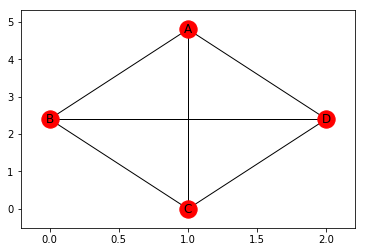

In [8]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([('A', 'B'),('B', 'A'),('B','C'),('C','B'),
                  ('C','D'),('D','C'),('D','A'),('A','D')], weight = 13)
G.add_edges_from([('B','D'),('D','B')], weight=10)
G.add_edges_from([('A','C'),('C','A')], weight=24)

positions = {'A':(1,4.8),'B':(0,2.4),'C':(1,0),'D':(2,2.4)}

nx.draw_networkx(G, pos=positions) 

In the above graph, if we start at A, the shortest path should be A-B-C-D-A, which costs 13*4 = 52.

But if we use nearest neighbor heuristic, the path we choose will be A-B-D-C-A (since B-D = 10 < 13 = B-C), which costs 13 + 10 + 13 + 24 = 60.

In this situation, nearest neighbor heuristic fails.

## Create a graph where the 2-opt heuristic fails. In other words, first find a feasible solution on your graph. Then run 2-opt until you get stuck, but the final solution is not the shortest Hamiltonian cycle.

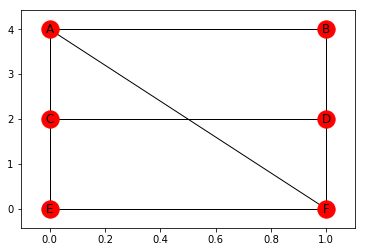

In [9]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([('A', 'B'),('C','D'),('E','F')], weight=1)
G.add_edges_from([('A','C'),('B','D'),('C','E'),('D','F')], weight=2)
G.add_edges_from([('F','A')],weight=17**(.5))
positions = {'F':(1,0),'E':(0,0),'D':(1,2),'C':(0,2),'B':(1,4),'A':(0,4)}

nx.draw_networkx(G,arrows=True,pos=positions) 

In the above graph, if we start at A, the shortest path should be A-C-E-F-D-B-A, which costs 10.

When we use nearest neighbor heuristic, the path we choose will be A-B-D-C-E-F-A , which costs 7 + sqrt(17) > 10

If we start with the solution from nearest neighbor heuristic and use 2-opt heuristic to improve it, we can never find the best solution.

# Consider the Dial-a-Ride problem, where we have n passengers to pick up and drop. 

## Formulate the Dial-a-Ride problem as an integer program.

The vertex set Nodes is partitioned into $Nodes = U \cup V \cup \{0, 2n + 1\}$, where {0, 2n + 1} are two copy of node D. $U = \{1,2,...,n\}$ is the set of pickup vertices and $V = \{n+1,n+2,...,2n\}$ is the set of dropoff vertices. $t_i$ represents the time we pass the node i.

Our objective is:
$$min \space \sum_{i \in Nodes}\sum_{j \in Nodes} {c_{ij} * f_{ij}}$$

subject to:
$$\sum_{i \in Nodes} {f_{ij}} = 1, \forall j \in U \cup V$$
$$\sum_{j \in Nodes} {f_{ij}} = 1, \forall i \in U \cup V$$
$$ t_i < t_{n+i}, \forall i = 1,2,...,n$$
$$f_{ij} = 0\space or\space 1, \forall i,j \in Nodes$$

## Devise a heuristic for finding a decent feasible solution for the Dial-a-Ride problem.

To find a feasible solution, we can based on Nearest Neighbor Heuristic.
We start from the node D, and choose a nearest node from the avaliable set. The avaliable set includes all the left pickup vertices and the dropoff vertices corresponding those who has already been picked up.

## Provide a a heuristic to potentially improve any feasible solution.

We can use 2-opt to improve our solution.

We start with a Hamiltonian cycle, and repeat the following procedure until no more improve- ment is possible. Take any two edges that do not share a node, and remove them from the cycle. Now add 2 edges to make a new Hamiltonian cycle. If this new Hamiltonian cycle is cheaper and satisfies the constraints, then keep it. Otherwise, revert back to the original cycle.